# Machine learning
Simply, machine learning is a mathematical technique that allows a software to predict an output given an input without explicitly programmed to do so.
>
>
There are two types of Machine learning.
- **Supervised learning** — Trained using annotated data set.
- **Un-supervised learning** — Tratined using raw data set.
>
Let’s discuss an algorithm called linear regression in detail. This comes under supervised learning.
>
<img src="https://programmathically.com/wp-content/uploads/2021/06/Screenshot-2021-06-13-at-15.35.02-1082x1536.png" alt= “” width="500" height="200">


# Linear regression

In machine learning, Linear regression is used to train the models `to find the linear relationship between the inputs and outputs`.

We have the below dataset where X is an input and Y is an output.


| X (Input) | 1 | 2 | 3 | 4 | 5 | 6 | ... |
| --- | --- | --- | --- | --- | --- | --- | --- |
| Y (Output) | 3 | 5 | 7 | 9 | 11 | 13 | ... |

**The task is to train a model which can predict an output (Y) given an arbitrary input (X) which is not in the data set.**
>
Let's plot this as a graph

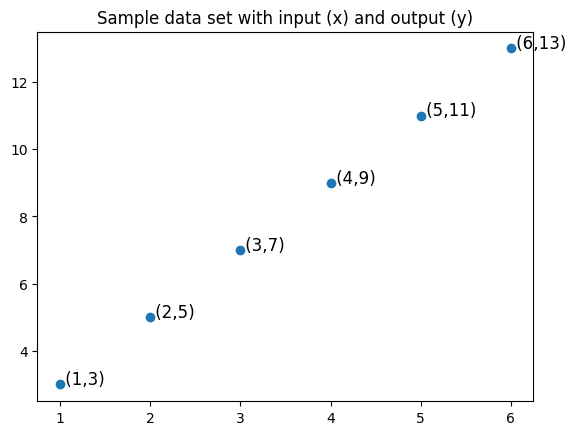

In [146]:
from matplotlib import pyplot as plt
import numpy as np

#declaring input and output of the training data set.
x = [1,2,3,4,5,6]
y = [3,5,7,9,11,13]

#plottig the input X and output Y as graph
fig, ax = plt.subplots()
ax.scatter(x=x, y=y)
ax.set(title="Sample data set with input (x) and output (y)")
for i,j in zip(x, y): 
    ax.annotate(" ("+str(i)+","+str(j)+")",xy=(i,j), size=12)
plt.show()

It is evident from the graph that a straight line can be fitted for the given data points. 
>
Using extrapolation, we can find Y for any arbitrary input X. 
>
We can define a model for fitting a straight line and let a machine learn the parameters of the model.
>
- `Y = mX + b`
>
where **m** and **b** are the parameters of the model.
>

The goal is to find the best values for the parameters (slope (m) and intercept (b) ) that minimize the error between the predicted values and the actual target values.

>
If you look closer, you can identify the parameters m and b that fits between input X and output Y.

- `Y = 2X + 1` where m=2 and b=1

>
Let’s see how we find the values m and b using linear regression.
>


# The steps for training model using linear regression are as follows:
# 1. Initialization:
We start by initializing the values of the parameters (slope and intercept) with some arbitrary values. 
>
These values can be chosen randomly or set to zero. Let's initialize the parametersm and b in our model to zero.

In [147]:
m=0;
b =0;
n = len(x)

# 2. Forward propagation:
Evaluate the output (y_pred) using the values initialized for parameters m and b.
>
- `y_pred = m*x + b`

In [148]:
y_pred = np.multiply(m, x) + b;
print(y_pred);

[0 0 0 0 0 0]


# 3. Define the loss function:
In linear regression, the most common loss function used is the mean squared error (MSE), which measures the average squared difference between the predicted values and the actual target values. 
>
**The MSE (L) is given by:**
`L = (1/n) * Σ(y_pred - y)^2`
>
where **n** is the number of data points in the dataset
>
**y_pred** is the predicted value for a given input (X) using the current parameter values
>
**y** is the actual target value corresponding to the input (X)
>
Let's calculate the loss between the predicted values **y_pred** and actual values **y**

In [149]:
L = sum(np.square(np.subtract(y_pred, y)))/n
print(L);

75.66666666666667


# 4. Calculate the gradients:
The gradients represent how the loss function changes with respect to each parameter. 
>
We need to compute the partial derivatives of the loss function with respect to the parameters (slope and intercept). 
>
The gradients are calculated as follows: 
- `dL/dm = (2/n) * Σ(X * (y_pred - y_actual))` - Indicates how the loss function changes when we slightly increase the value m.
- `dL/db = (2/n) * Σ(y_pred - y_actual)` - Indicates how the loss function changes when we slightly increase the value b.
>
---
**Let's see how we derived the gradients dL/dm  and dL/db in detail.**
>
`L = (1/n) * Σ(y_pred - y_actual)^2` 
- when `y =x^2`, `dy/dx = 2x`
>
∴ `dL/dm = (1/n) * Σ(2 * (y_pred - y_actual) * d(y_pred)/dm)`
- `y_pred = m * X + b`
- when `y =x`, `dy/dx = x`. Similarly, derivative of constant is always zero.

>
∴ `Using chain rule, when y=mx, dy/dx = m * d(x)/dx + x* d(m)/dx = mx`
- `d(y_pred)/dm = d(m*X + b)/dm = X`
```
∴ dL/dM = (2/n) * Σ((y_pred- y_actual) * X)
```
---
- ```dL/db = (1/n) * Σ(2 * (y_pred - y_actual) * d(y_pred)/db)```
>
- ```y_pred = m * X + b```
>
```d(y_pred)/db = d(m*X + b)/db = 1```

```
∴ dL/db = (2/n) * Σ(y_pred - y_actual)
```


In [150]:
dL_m = (2/n) * sum(x * (y_pred - y));
print(dL_m);
dL_b = (2/n) * sum(y_pred - y);
print(dL_b);

-67.66666666666666
-16.0


# 5. Update the parameters: 
The parameters are updated iteratively using the gradients and a learning rate (α) that controls the step size of each update. 
>
The parameter update equations are as follows: 
- m= m - α * dL/dm 
- b = b - α * dL/db
>
**Where:** 
α (alpha) is the learning rate, a small positive value that determines the step size of the update
>
The gradients dL_m and dL_b calculated above is negative, which indicates that loss reduces when we increase the value for the parameters m and b.


In [151]:
alpha = 0.01;
m = m - (alpha * dL_m);
print("updated m = ", m);

b = b - (alpha * dL_b);
print("updated b = ", b);

updated m =  0.6766666666666666
updated b =  0.16


# 6. Repeat the steps 4 and 5:
The previous steps are repeated until the loss function (L) converges to zero or threshold or a predefined number of iterations. 
>
Let's train the model by repeating the steps for 100 times in the loop and see how the loss converges

Loss at the end of the training 0.023819359608382714
Updated m =  2.0818800902162136
Updated b =  0.6494550806075945


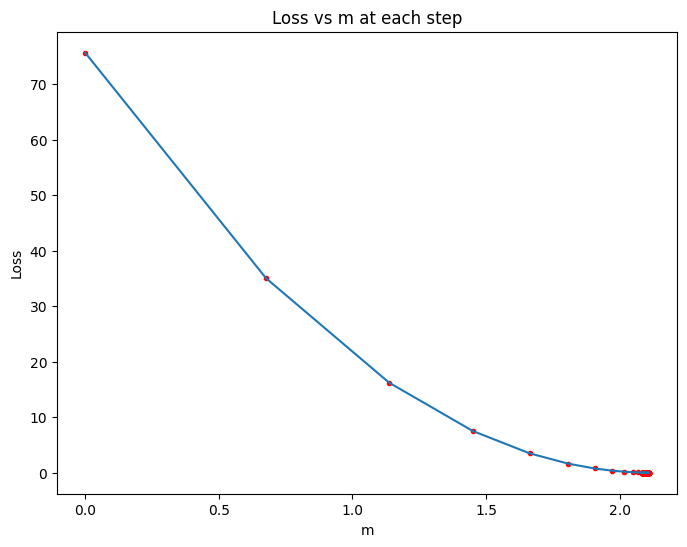

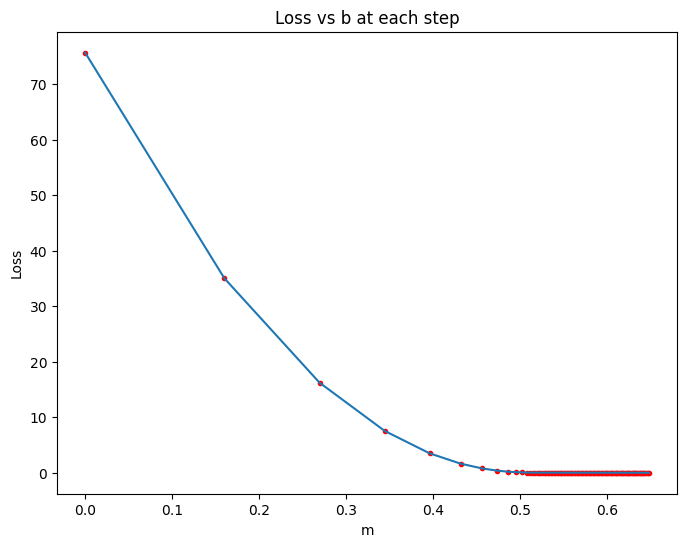

In [166]:
def train(x, y, m, b, epoch, alpha=0.01):
    
    cost_at_each_step = []
    m_at_each_step = []
    b_at_each_step = []
    
    for i in range(epoch):
        #forward propagation
        y_pred = np.multiply(m, x) + b;

        #Computing loss (MSE)
        L = sum(np.square(np.subtract(y_pred, y)))/n;

        cost_at_each_step.append(L)

        #calculate the gradients
        dL_m = (2/n) * sum(x * (y_pred - y)) ;

        dL_b = (2/n) * sum(y_pred - y) ;

        m_at_each_step.append(m)
        b_at_each_step.append(b)

        #update the parameters
        m = m - (alpha * dL_m);

        b = b - (alpha * dL_b);
        
    
    print("Loss at the end of the training", L);
    print("Updated m = ", m);
    print("Updated b = ", b);    

    #plot the graph between parameter m and loss function L at each step
    plt.figure(figsize = (8,6))
    plt.plot(m_at_each_step, cost_at_each_step)
    plt.scatter(m_at_each_step, cost_at_each_step, marker='.', color='red')
    plt.title("Loss vs m at each step")
    plt.ylabel("Loss")
    plt.xlabel("m")
    plt.show()
    
    #plot the graph between parameter m and loss function L at each step
    plt.figure(figsize = (8,6))
    plt.plot(b_at_each_step, cost_at_each_step)
    plt.scatter(b_at_each_step, cost_at_each_step, marker='.', color='red')
    plt.title("Loss vs b at each step")
    plt.ylabel("Loss")
    plt.xlabel("m")
    plt.show()

train(x, y, m=0, b=0, epoch=100);

The graph indicates how the parameters m and b are tuned at each step and loss converges to zero at each step.
> 
Also the learning rate (alpha) controls how much the parameters m and b are modified at each step. If we set the higher learning rate, we face a problem called over shooting.
> 
Let's see change the learning rate from 0.01 from 0.06

Loss at the end of the training 3.020401287509604e-21
Updated m =  2.0000000000286233
Updated b =  0.9999999998774584


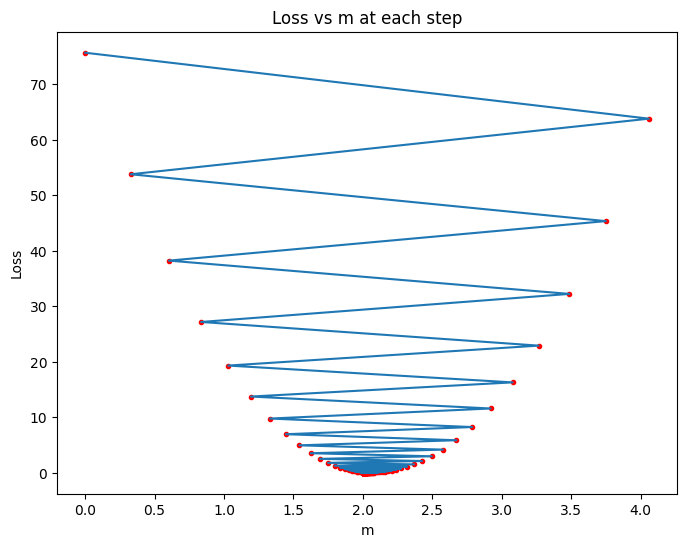

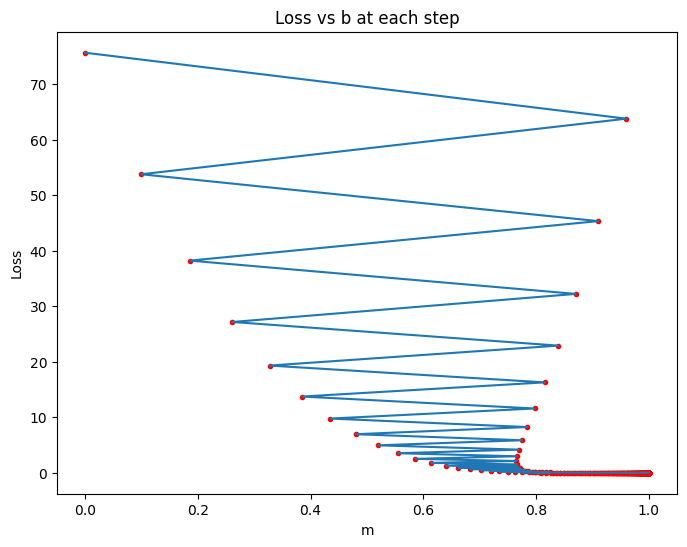

In [175]:
train(x, y, m=0, b=0, alpha=0.06, epoch=1000)

These are the fundamental steps involved in training ML and DL models.
>
Also it is evident that the dataset is the key for supervised learning.
>
Similar to this, we can train models for fitting complex relation between input and output. 
